In [138]:
import pandas as pd

In [139]:
df = pd.read_csv('insurance.csv')

In [140]:
df.head() #top 5 row
#df.tail()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
print('shape and size of the data is: ', df.shape) #(rows, columns)

shape and size of the data is:  (1338, 7)


In [142]:
print('check if there is duplicate :', df.duplicated().sum())
df=df.drop_duplicates() # or we can do: df.drop_duplicates(inplace=True)

check if there is duplicate : 1


In [143]:
print('check if there is duplicate :', df.duplicated().sum())

check if there is duplicate : 0


In [144]:
print('check the null values', df.isnull().sum()) #if it has null value, use fillna

check the null values age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [145]:
# Assuming df is your dataframe
df_updated = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True) #drop_first avoid multicolinearity, get rid of sex_female, smoker_no etc
# Print or use the list of dependent variables as needed
df_updated

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [146]:
bool_columns = df_updated.select_dtypes(include='bool').columns
df_updated[bool_columns] = df_updated[bool_columns].astype(int)
df_updated

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [147]:
correlation_matrix = df_updated.corr().round(2) #find correlation, the amount you consume highly correlated with ur weight, strong colleration 1,-1; 0.7,-0.8; weak correlation 0, 0.01-0.03
correlation_matrix

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.00,0.11,0.04,0.30,-0.02,-0.03,0.00,-0.01,0.01
bmi,0.11,1.00,0.01,0.20,0.05,0.00,-0.14,0.27,-0.01
children,0.04,0.01,1.00,0.07,0.02,0.01,0.03,-0.02,0.02
charges,0.30,0.20,0.07,1.00,0.06,0.79,-0.04,0.07,-0.04
sex_male,-0.02,0.05,0.02,0.06,1.00,0.08,-0.01,0.02,-0.00
smoker_yes,-0.03,0.00,0.01,0.79,0.08,1.00,-0.04,0.07,-0.04
region_northwest,0.00,-0.14,0.03,-0.04,-0.01,-0.04,1.00,-0.35,-0.32
region_southeast,-0.01,0.27,-0.02,0.07,0.02,0.07,-0.35,1.00,-0.35
region_southwest,0.01,-0.01,0.02,-0.04,-0.00,-0.04,-0.32,-0.35,1.00


In [148]:
charges = correlation_matrix.iloc[3]
charges

,charges
age,0.30
bmi,0.20
children,0.07
charges,1.00
sex_male,0.06
smoker_yes,0.79
region_northwest,-0.04
region_southeast,0.07
region_southwest,-0.04


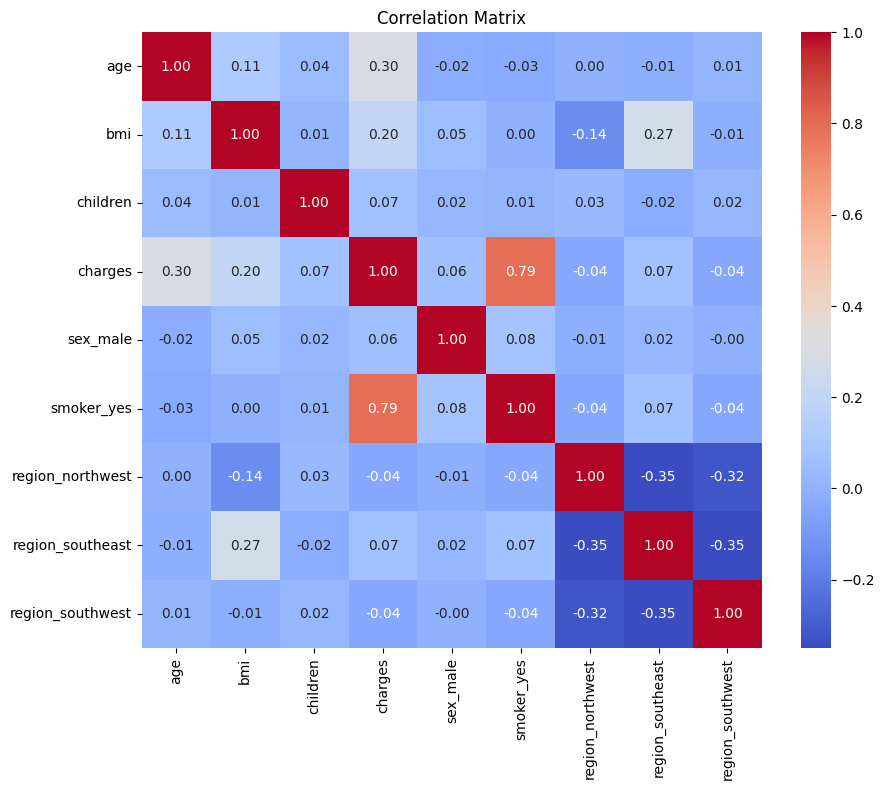

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #0.2f, decimal
plt.title('Correlation Matrix')
plt.show()

In [150]:

# Separate features (X) and target (y)
X = df_updated.drop(columns=['charges'])
y = df_updated['charges']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Lin_reg = LinearRegression()

Lin_reg.fit(X_train, y_train)

print(Lin_reg.intercept_)
print(Lin_reg.coef_)

from sklearn.metrics import mean_squared_error

# Predicting on the test set
y_pred = Lin_reg.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)

# Calculating RMSE
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


-11516.781029185731
[  251.24617223   328.38309611   522.15536198  -111.90716088
 22874.44640656  -465.74659644  -936.09932553  -765.58388611]
Mean Squared Error (MSE): 38940169.92282636
Root Mean Squared Error (RMSE): 6240.205919905718


In [151]:
import statsmodels.api as sm

x = sm.add_constant(X_train)
model = sm.OLS(y_train,x).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     323.1
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          6.73e-262
Time:                        15:02:50   Log-Likelihood:                -9458.3
No. Observations:                 935   AIC:                         1.893e+04
Df Residuals:                     926   BIC:                         1.898e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.152e+04   1189.078  

In [152]:
df_updated = df_updated.drop(columns=['region_northwest','region_southwest'])
df_updated

,age,bmi,children,charges,sex_male,smoker_yes,region_southeast
0,19,27.900,0,16884.92400,0,1,0
1,18,33.770,1,1725.55230,1,0,1
2,28,33.000,3,4449.46200,1,0,1
3,33,22.705,0,21984.47061,1,0,0
4,32,28.880,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,1
1336,21,25.800,0,2007.94500,0,0,0


In [158]:

# Separate features (X) and target (y)
X = df_updated.drop(columns=['charges'])
y = df_updated['charges']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Lin_reg = LinearRegression()

Lin_reg.fit(X_train, y_train)

print(Lin_reg.intercept_)
print(Lin_reg.coef_)

from sklearn.metrics import mean_squared_error

# Predicting on the test set
y_pred = Lin_reg.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)

# Calculating RMSE
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


-11831.769436153649
[  251.72557662   323.91583395   523.45766503  -103.70414078
 22896.43900025  -501.61565374]
Mean Squared Error (MSE): 39120394.74903355
Root Mean Squared Error (RMSE): 6254.629865070638


In [159]:
import statsmodels.api as sm

from statsmodels.tools.eval_measures import rmse

x = sm.add_constant(X_train)
model = sm.OLS(y_train,x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     430.6
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          3.87e-264
Time:                        15:04:28   Log-Likelihood:                -9459.2
No. Observations:                 935   AIC:                         1.893e+04
Df Residuals:                     928   BIC:                         1.897e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.183e+04   1151.388  

In [156]:

# Given data points
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([6, 8, 11, 12, 14, 18])

# Add constant term to independent variable
x_const = sm.add_constant(x)

# Fit OLS model
model = sm.OLS(y, x_const).fit()

# Print model summary
print(model.summary())

from statsmodels.tools.eval_measures import rmse

# Predicting on the same data used for training (for demonstration purposes)
y_pred = model.predict(x_const)

# Calculate RMSE
rmse_value = rmse(y, y_pred)

print("Root Mean Squared Error (RMSE):", rmse_value)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     152.2
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           0.000248
Time:                        15:02:50   Log-Likelihood:                -5.6925
No. Observations:                   6   AIC:                             15.38
Df Residuals:                       4   BIC:                             14.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6000      0.712      5.053      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [157]:
import numpy as np

# Generate x values
x = np.arange(1, 101)  # Generating x values from 1 to 100

# Compute corresponding y values (assuming a linear relationship with slope 2 and intercept 4)
y = 2 * x + 4

# Add constant term to independent variable
x_const = sm.add_constant(x)

# Fit OLS model
model = sm.OLS(y, x_const).fit()

# Print model summary
print(model.summary())

from statsmodels.tools.eval_measures import rmse

# Predicting on the same data used for training (for demonstration purposes)
y_pred = model.predict(x_const)

# Calculate RMSE
rmse_value = rmse(y, y_pred)
rmse_rounded = round(rmse_value, 2)
print("Root Mean Squared Error (RMSE):", rmse_rounded)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.232e+32
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:02:50   Log-Likelihood:                 2917.8
No. Observations:                 100   AIC:                            -5832.
Df Residuals:                      98   BIC:                            -5826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0000   1.05e-14   3.82e+14      0.0